 

*   install important dependencies
*   apply filters and find edge for localization
*   Find contours and apply masks
*   use EasyOCR for numberplate text recognition
*   render results


In [5]:
!pip install opencv-python
!pip install imutils
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import easyocr
import cv2
import imutils

**READS IN GRAYSCALE AND BLUR**

In [7]:
img=cv2.imread("/content/drive/MyDrive/new_repository/numberplate_text_detection/sample_images/image4.jpg")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

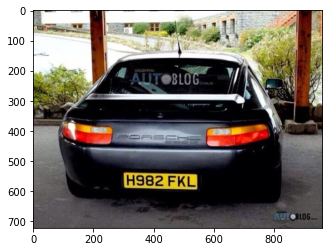

In [8]:

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**Noise reduction**

In [9]:
bilat_fil=cv2.bilateralFilter(gray,11,17,17)

**Edge Detection**

In [10]:
edge=cv2.Canny(bilat_fil,30,200)

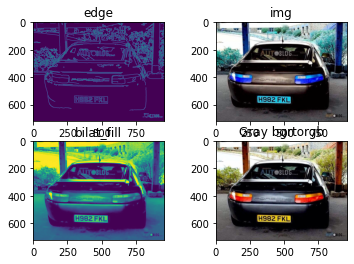

In [11]:
plt.subplot(221)
plt.title("edge")
plt.imshow(edge)
plt.subplot(222)
plt.title("img")
plt.imshow(img)
plt.subplot(223)
plt.title("bilat_fill")
plt.imshow(bilat_fil)
plt.subplot(224)
plt.title("Gray bgrtorgb")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


**FIND CONTOURS AND APPLY MASKS**


In [12]:
response=cv2.findContours(edge.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [13]:
contours=imutils.grab_contours(response)

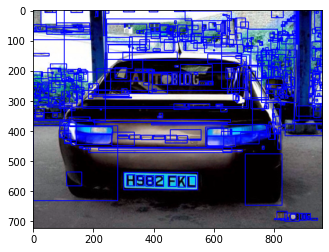

In [14]:
img_temp=img.copy()
for c in contours:
  x,y,w,h=cv2.boundingRect(c)
  cv2.rectangle(img_temp,(x,y),(x+w,y+h),(0,0,255),2)
  plt.imshow(img_temp)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

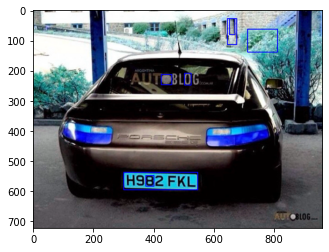

In [18]:
img_temp1=img.copy()
for c in contours:
  x,y,w,h=cv2.boundingRect(c)
  cv2.rectangle(img_temp1,(x,y),(x+w,y+h),(0,0,255),2)
  plt.imshow(img_temp1)

In [19]:
len(contours)

10

In [20]:
Location=None
dic={}
count=0
for c in contours:
  approx=cv2.approxPolyDP(c,20,True)
  dic[f"{count}"]=len(approx)
  count=count+1
  if len(approx)==4:
    Location=approx
    break

In [21]:
Location

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

In [22]:
print(len(Location))

4


In [23]:
Location=np.expand_dims(Location,0)

300 540 53 244


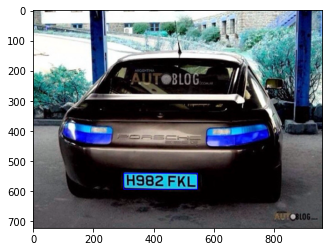

In [24]:
img_temp2=img.copy()
for i in Location:
  x,y,w,h=cv2.boundingRect(i)
  cv2.rectangle(img_temp2,(x,y),(x+w,y+h),(0,0,255),2)
  print(f"{x}"+" "+f"{y}"+" "+f"{h}"+" "+f"{w}")
  plt.imshow(img_temp2)

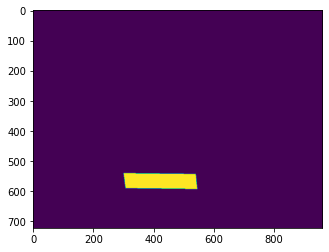

In [25]:
mask=np.zeros(gray.shape,np.uint8)                             #it was used to create a blank mask of shame shape as gray...

new_image = cv2.drawContours(mask,Location,0,255,-1)
plt.imshow(new_image)


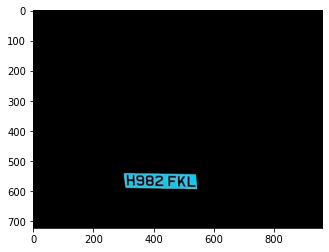

In [26]:
new_image = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(new_image)


In [ ]:
reader=easyocr.Reader(["en"] ,gpu=True)

In [ ]:
text=reader.readtext(new_image)

In [ ]:
text

In [ ]:
x,y=np.where(mask==255)
x1,y1=np.min(x),np.min(y)
x2,y2=np.max(x),np.max(y)
cropped_image=gray[x1:x2+1 , y1:y2+1]

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [ ]:
text=reader.readtext(cropped_image)

In [ ]:
text